# KNN - K vecinos más cercanos #

Algoritmo de aprendizaje supervisado que estima la probabilidad de que un elemento "x" pertenezca a una clase "c" a partir de la información proporcionada, basandose en los elementos cercanos al que queremos clasificar. Puede trabajar con cualquier número de clases.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sitios para buscar datasets ##

- [Kaggle](https://www.kaggle.com)


In [40]:
dataframe = pd.read_csv(r'C:\\Users\\David\\PYTHON\CURSO_IBM_SkillsBuild_Machine_Learning\\archivos\\vehiculos.csv')
# Se muestra el dataframe original
dataframe.head()


,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [41]:
dataframe['vehicle_class'].unique()
#Mostrando los tipos de vehiculos que hay en el dataframe

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [48]:
y = dataframe['vehicle_class']
X = dataframe.drop('vehicle_class', axis=1)
# Separamos la variable dependiente de las independientes

In [49]:
from sklearn.model_selection import train_test_split
# Separa los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# Importando el clasificador KNN

# Inicializando el clasificador con la variable n_neighbors en 1
knn = KNeighborsClassifier(n_neighbors=1)

# Se entrena el clasificador con los datos de entrenamiento
knn.fit(X_train, y_train)
# Se hacen predicciones con los datos de prueba
predicciones = knn.predict(X_test)
predicciones



array(['bus', 'van', 'bus', 'van', 'bus', 'van', 'bus', 'saab', 'bus',
       'opel', 'saab', 'bus', 'bus', 'saab', 'saab', 'saab', 'bus', 'bus',
       'opel', 'saab', 'van', 'van', 'opel', 'opel', 'opel', 'opel',
       'van', 'van', 'van', 'van', 'saab', 'van', 'bus', 'van', 'van',
       'bus', 'saab', 'saab', 'bus', 'opel', 'van', 'bus', 'opel', 'van',
       'saab', 'opel', 'bus', 'van', 'bus', 'saab', 'bus', 'bus', 'opel',
       'van', 'bus', 'saab', 'saab', 'opel', 'opel', 'bus', 'bus', 'opel',
       'opel', 'saab', 'bus', 'bus', 'saab', 'opel', 'saab', 'saab',
       'opel', 'bus', 'saab', 'bus', 'van', 'opel', 'saab', 'opel',
       'opel', 'van', 'bus', 'van', 'opel', 'saab', 'opel', 'saab',
       'opel', 'bus', 'van', 'saab', 'saab', 'opel', 'opel', 'saab',
       'saab', 'saab', 'van', 'van', 'bus', 'opel', 'saab', 'saab',
       'saab', 'van', 'bus', 'bus', 'opel', 'van', 'opel', 'saab', 'van',
       'bus', 'van', 'bus', 'bus', 'van', 'bus', 'opel', 'bus', 'opel',
   

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
# Importando las métricas de clasificación y matriz de confusión
# Se imprime la matriz de confusión
print(confusion_matrix(y_test, predicciones))

[[61  4 12  1]
 [ 0 17 26  4]
 [ 4 32 34  1]
 [ 2  2  3 51]]


In [55]:
print(classification_report(y_test, predicciones))
# Se imprime el reporte de clasificación

              precision    recall  f1-score   support

         bus       0.91      0.78      0.84        78
        opel       0.31      0.36      0.33        47
        saab       0.45      0.48      0.47        71
         van       0.89      0.88      0.89        58

    accuracy                           0.64       254
   macro avg       0.64      0.63      0.63       254
weighted avg       0.67      0.64      0.65       254



Podemos calcular el valor para n_neighbors más óptimo

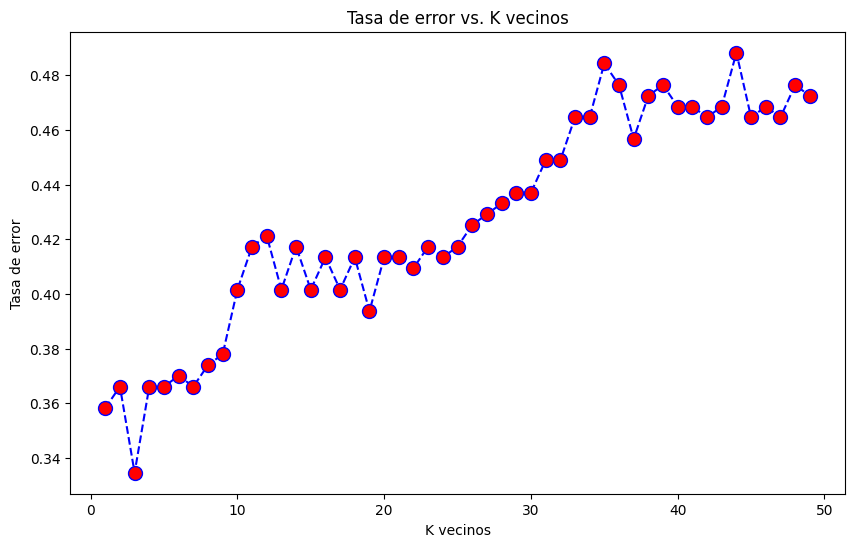

In [56]:
tasa_error = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predicciones = knn.predict(X_test)
    tasa_error.append(np.mean(predicciones != y_test))
# Se calcula la tasa de error para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), tasa_error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Tasa de error vs. K vecinos')
plt.xlabel('K vecinos')
plt.ylabel('Tasa de error')
plt.show()
# Se grafica la tasa de error en función de k

Vemos que el valor 3 es el que mejores resultados de precisión proporciona para este entrenamiento por lo que podemos usarlo para entrenar de nuevo el modelo de la forma más óptima.

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)

# Se entrena el clasificador con los datos de entrenamiento
knn.fit(X_train, y_train)
# Se hacen predicciones con los datos de prueba
predicciones = knn.predict(X_test)
predicciones

array(['bus', 'van', 'bus', 'bus', 'bus', 'van', 'van', 'saab', 'bus',
       'saab', 'saab', 'bus', 'bus', 'saab', 'opel', 'van', 'bus', 'opel',
       'opel', 'saab', 'van', 'van', 'opel', 'opel', 'saab', 'opel',
       'opel', 'van', 'van', 'van', 'saab', 'van', 'bus', 'van', 'van',
       'bus', 'saab', 'saab', 'bus', 'opel', 'van', 'bus', 'opel', 'van',
       'saab', 'opel', 'bus', 'van', 'bus', 'van', 'bus', 'opel', 'opel',
       'van', 'bus', 'saab', 'opel', 'opel', 'opel', 'saab', 'bus',
       'opel', 'bus', 'saab', 'bus', 'bus', 'saab', 'saab', 'bus', 'saab',
       'van', 'bus', 'saab', 'bus', 'van', 'opel', 'saab', 'opel', 'opel',
       'van', 'bus', 'van', 'opel', 'saab', 'opel', 'saab', 'bus', 'bus',
       'van', 'saab', 'saab', 'opel', 'bus', 'saab', 'saab', 'bus', 'van',
       'van', 'bus', 'opel', 'saab', 'saab', 'saab', 'van', 'bus', 'bus',
       'opel', 'van', 'opel', 'saab', 'van', 'bus', 'van', 'bus', 'bus',
       'van', 'bus', 'opel', 'bus', 'opel', 'bus', 

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
# Importando las métricas de clasificación y matriz de confusión
# Se imprime la matriz de confusión
print(confusion_matrix(y_test, predicciones))

[[61  6 10  1]
 [ 1 23 21  2]
 [ 8 31 31  1]
 [ 1  3  0 54]]


In [59]:
print(classification_report(y_test, predicciones))
# Se imprime el reporte de clasificación

              precision    recall  f1-score   support

         bus       0.86      0.78      0.82        78
        opel       0.37      0.49      0.42        47
        saab       0.50      0.44      0.47        71
         van       0.93      0.93      0.93        58

    accuracy                           0.67       254
   macro avg       0.66      0.66      0.66       254
weighted avg       0.68      0.67      0.67       254



Aquí podemos ver como han mejorado las tasas de precisión del modelo.